In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [439]:
data = pd.read_csv("zomato.csv")
df = pd.DataFrame(data)

## **Cleaning the Data**

## *Checking the Dataset*

In [442]:
df.shape

(51717, 17)

In [443]:
## checking for duplicate values
df.duplicated().sum()


0

In [444]:
## Checking for the null values in the data set
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [445]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## *Cleaning the Rate coloumns*

In [448]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [449]:
## we will remove "/5", "NEW" , "-" and also check if any string value is there or not
df["rate"].unique()

def rate_fix(value):
    if (value == "NEW" or value == "-"):
        return np.nan
    else:
        value = str(value).split("/")
        value = value[0]
        return float(value)

df["rate"] = df["rate"].apply(rate_fix)


## we will fill the null values with mean

rate_mean = df["rate"].mean()
formatted_rate_mean = f"{rate_mean:.1f}"
df["rate"]= df["rate"].fillna(formatted_rate_mean)
df["rate"].isnull().sum()

0

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         51717 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [451]:
## finding the modes and filling them in missing data 

cost_mode= df["approx_cost(for two people)"].mode()[0]
cuisines_mode = df["cuisines"].mode()[0]
location_mode = df["location"].mode()[0]
dish_liked_mode = df["dish_liked"].mode()[0]
rate_mode  = df["rate"].mode()[0]



df["approx_cost(for two people)"] = df["approx_cost(for two people)"].fillna(cost_mode)
df["cuisines"] = df["cuisines"].fillna(cuisines_mode)
df["location"] = df["location"].fillna(location_mode)
df["dish_liked"] = df["dish_liked"].fillna(dish_liked_mode)
df["rate"] = df["rate"].fillna(rate_mode)

In [452]:
## filling the missing values where we cannot fill with median
df["rest_type"] = df["rest_type"].fillna("not available")
df["phone"] = df["phone"].fillna("not available")


## **Renaming the Columns**

In [454]:
df.rename(columns = {"listed_in(type)" : "type" , "approx_cost(for two people)" : "cost2plates" }, inplace = True)

In [455]:
## *Deleteing the listed_in(city) column as it is same as location

In [456]:
del df["listed_in(city)"]


## *Cleaning the cost2plate column*

In [458]:
def handlecommas(value):
    value = str(value)
    if "," in value:
        value = value.replace("," , "")
        return float(value)
    else:
        return float(value)

df["cost2plates"] = df["cost2plates"].apply(handlecommas)
df["cost2plates"].unique()


array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

## *Cleaning location columns*

In [460]:
## for less than 1000 in a  area

location =  df["location"].value_counts()
location_less_1000 = location[location < 1000]

def handlelocation(value):
    if value in location_less_1000:
        return "other"
    else:
        return value

df["location"]  = df["location"].apply(handlelocation)
df["location"].unique()

array(['other', 'Jayanagar', 'JP Nagar', 'Bannerghatta Road', 'BTM',
       'Electronic City', 'HSR', 'Marathahalli', 'Sarjapur Road',
       'Koramangala 5th Block', 'Koramangala 7th Block',
       'Koramangala 4th Block', 'Bellandur', 'Whitefield', 'Indiranagar',
       'Koramangala 1st Block', 'Brigade Road', 'Ulsoor',
       'Koramangala 6th Block'], dtype=object)

## *Cleaning cuisines column*

In [462]:
## for less than 1000 in a  area

cuisines =  df["cuisines"].value_counts()
cuisines_less_1000 = cuisines[cuisines < 1000]

def handlecuisines(value):
    if value in cuisines_less_1000:
        return "other"
    else:
        return value

df["cuisines"]  = df["cuisines"].apply(handlecuisines)
df["cuisines"].unique()

array(['other', 'North Indian', 'South Indian', 'North Indian, Chinese'],
      dtype=object)

## *Cleaning Rest Type column*

In [464]:
rest_type = df["rest_type"].value_counts(ascending = False)

rest_type_less_than_1000 = rest_type[rest_type < 1000]

def handlerest_type(value):
    if value in rest_type_less_than_1000:
        return "other"
    else:
        return value

df["rest_type"]  =  df["rest_type"].apply(handlerest_type)


## **Analysing Categorical data**

## *Analysing Online Order Resturants data* 

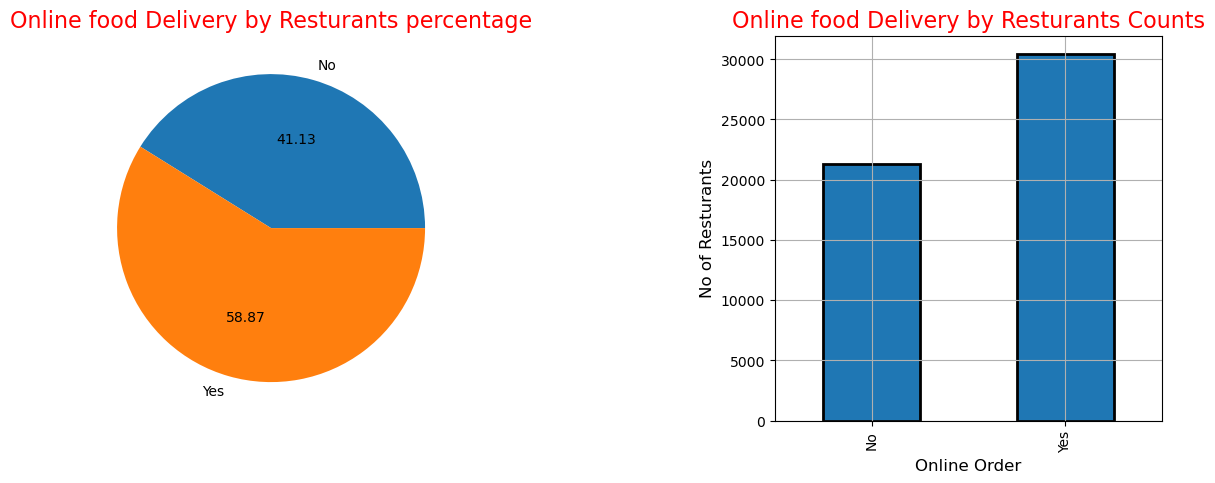

In [467]:
fig, ax = plt.subplots(1,2 , figsize = (14,5))
df.groupby("online_order").size().plot(kind = "pie", autopct = "%.2f", ax = ax[0])
ax[0].set_title("Online food Delivery by Resturants percentage", fontsize = 16,  color = "Red")

gr = df.groupby("online_order").size().plot(kind = "bar", ax = ax[1], linewidth = 2, edgecolor = "black")
ax[1].set_xlabel("Online Order", fontsize = 12)
ax[1].set_ylabel("No of Resturants", fontsize= 12)
ax[1].set_title("Online food Delivery by Resturants Counts", fontsize = 16,  color = "Red")
gr.grid()

plt.subplots_adjust(wspace = 0.8)

## *Analysing Booking Table in Resturants* 

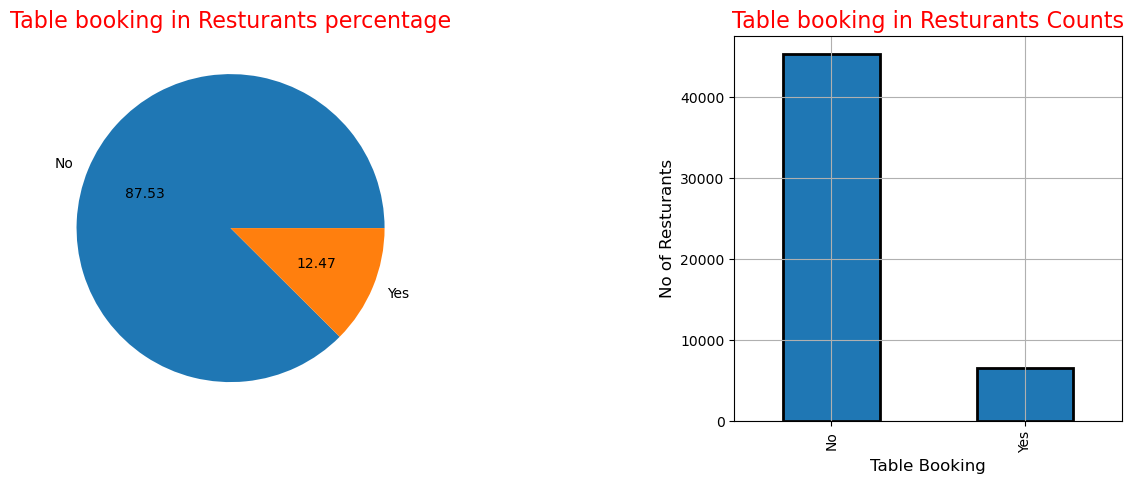

In [469]:
fig, ax = plt.subplots(1,2 , figsize = (14,5))
df.groupby("book_table").size().plot(kind = "pie", autopct = "%.2f", ax = ax[0])
ax[0].set_title("Table booking in Resturants percentage", fontsize = 16,  color = "Red")

gr = df.groupby("book_table").size().plot(kind = "bar", ax = ax[1], linewidth = 2, edgecolor = "black")
ax[1].set_xlabel("Table Booking", fontsize = 12)
ax[1].set_ylabel("No of Resturants", fontsize= 12)
ax[1].set_title("Table booking in Resturants Counts", fontsize = 16,  color = "Red")
gr.grid()

plt.subplots_adjust(wspace = 0.8)

## *Analysing Types of Resturant in data* 

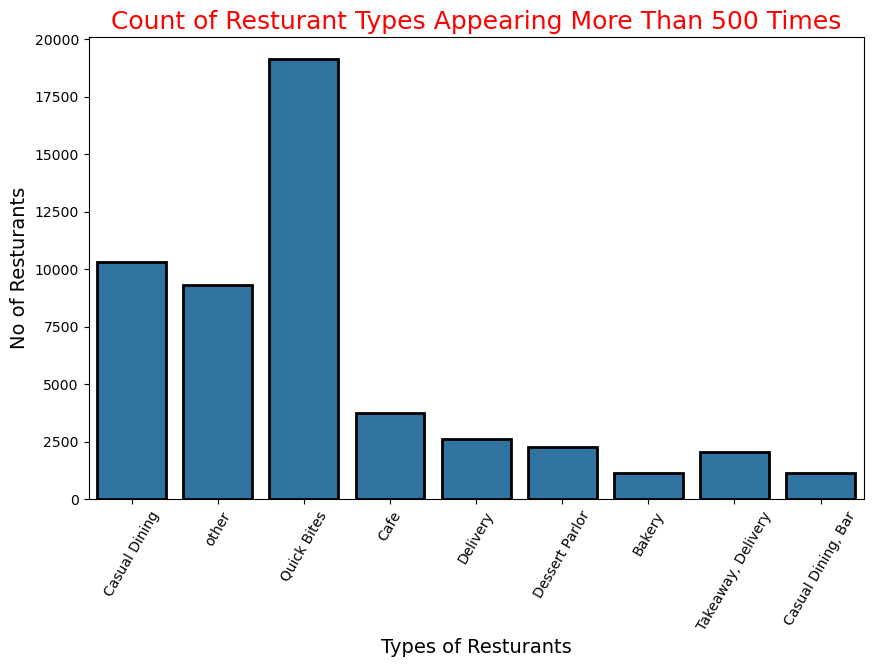

In [471]:
# Compute the frequency of each 'rest_type'
rest_type_counts = df['rest_type'].value_counts()

# Get rest types that appear more than 500 times
high_occurrence = rest_type_counts[rest_type_counts > 500].index

# Filter the DataFrame to include only high-occurrence rest types
high_rest = df[df['rest_type'].isin(high_occurrence)]

# Plot the count of each 'rest_type' that appears more than 100 times
plt.figure(figsize=(10, 6))
sns.countplot(data=high_rest, x='rest_type', edgecolor = "black", linewidth = 2)
plt.xlabel("Types of Resturants", fontsize = 14)
plt.ylabel("No of Resturants",  fontsize = 14)
plt.xticks(rotation=60)  # Rotate x-axis labels if needed
plt.title('Count of Resturant Types Appearing More Than 500 Times', fontsize = 18, color = "red")
plt.show()

## *Analysing Types of Resturant Listings* 

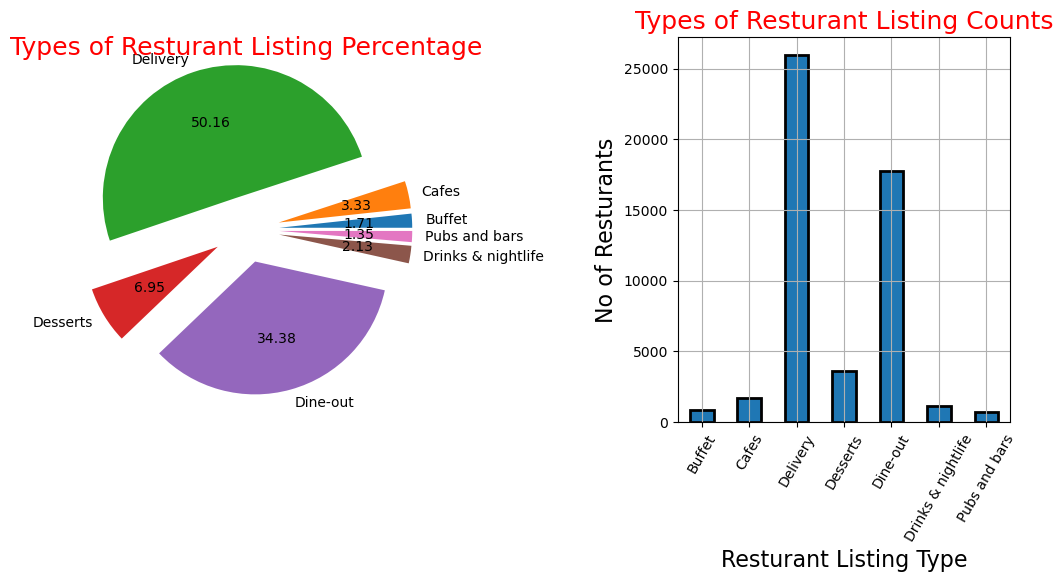

In [473]:
fig, ax = plt.subplots(1,2, figsize  = (12,5))
explode = [0.25,0.25,0.25,.25,0.25,.25,.25]
df.groupby("type").size().plot(kind = "pie", ax= ax[0], explode = explode, autopct = "%.2f")
ax[0].set_title("Types of Resturant Listing Percentage", fontsize =18, color = "red")



gr= df.groupby("type").size().plot(kind = "bar", edgecolor = "black", linewidth = 2, ax= ax[1])
plt.xticks(rotation  = 60)
ax[1].set_ylabel("No of Resturants", fontsize = 16)
ax[1].set_xlabel("Resturant Listing Type", fontsize =16)
ax[1].set_title("Types of Resturant Listing Counts", fontsize =18, color = "red")
gr.grid()

plt.subplots_adjust(wspace = 0.8)
plt.show()

## *Analysing the Resturants of the basis of price paid for 2 people*

In [547]:
# Create DataFrames for each price range
df_a = df[df['cost2plates'] > 2500]
df_b = df[(df['cost2plates'] > 2000) & (df['cost2plates'] <= 2500)]
df_c = df[(df['cost2plates'] > 1500) & (df['cost2plates'] <= 2000)]
df_d = df[(df['cost2plates'] > 1000) & (df['cost2plates'] <= 1500)]
df_e = df[(df['cost2plates'] > 500) & (df['cost2plates'] <= 1000)]
df_f = df[df['cost2plates'] <= 500]
df['cost2plates'] = df['cost2plates'].astype(int)

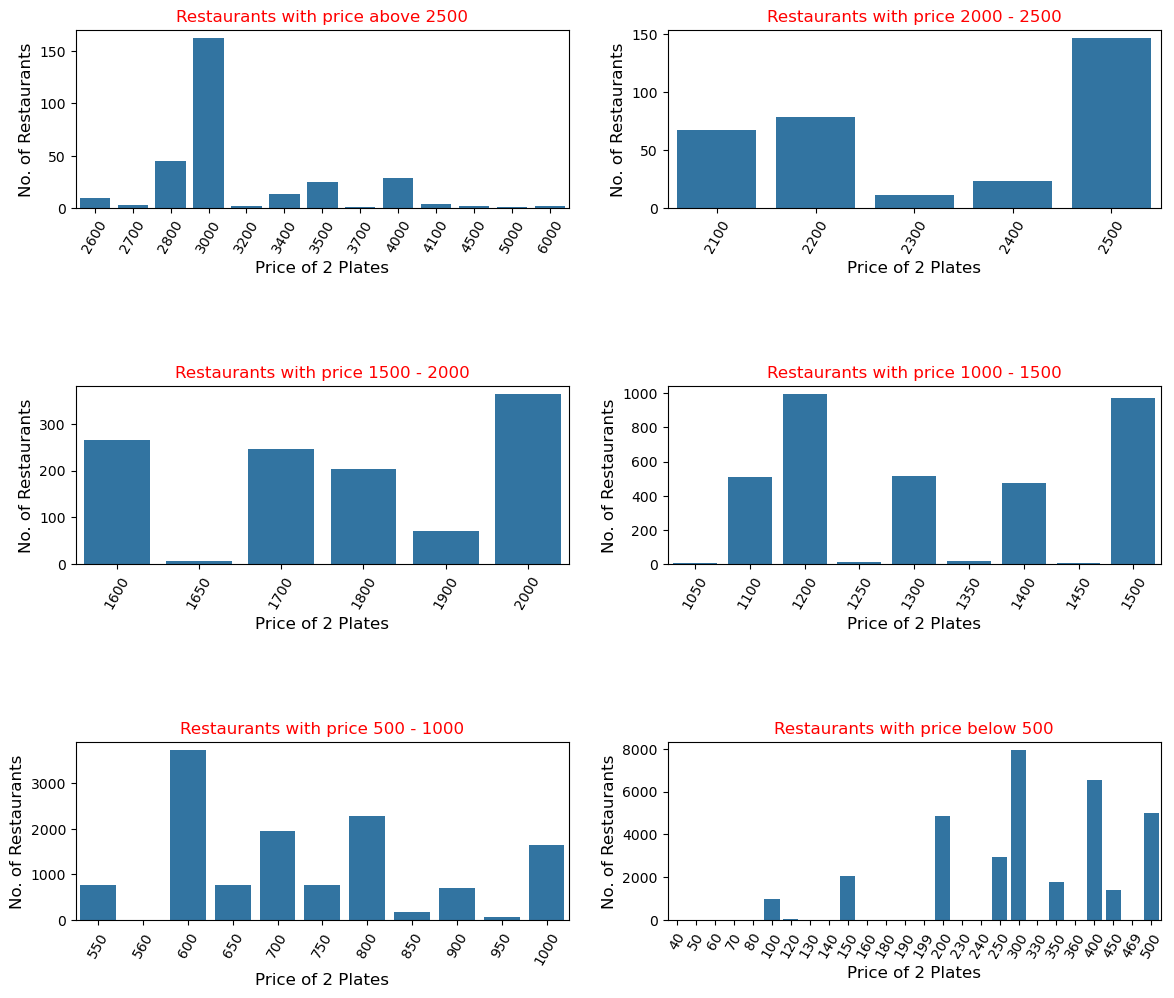

In [549]:
# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(14, 10))

# Plotting
sns.countplot(data=df_a, x="cost2plates", ax=ax[0, 0])
ax[0, 0].set_title("Restaurants with price above 2500", fontsize=12, color="Red")
ax[0, 0].tick_params(axis='x', rotation=60)
ax[0, 0].set_xlabel("Price of 2 Plates", fontsize=12)
ax[0, 0].set_ylabel("No. of Restaurants", fontsize=12)

sns.countplot(data=df_b, x="cost2plates", ax=ax[0, 1])
ax[0, 1].set_title("Restaurants with price 2000 - 2500", fontsize=12, color="Red")
ax[0, 1].tick_params(axis='x', rotation=60)
ax[0, 1].set_xlabel("Price of 2 Plates", fontsize=12)
ax[0, 1].set_ylabel("No. of Restaurants", fontsize=12)

sns.countplot(data=df_c, x="cost2plates", ax=ax[1, 0])
ax[1, 0].set_title("Restaurants with price 1500 - 2000", fontsize=12, color="Red")
ax[1, 0].tick_params(axis='x', rotation=60)
ax[1, 0].set_xlabel("Price of 2 Plates", fontsize=12)
ax[1, 0].set_ylabel("No. of Restaurants", fontsize=12)

sns.countplot(data=df_d, x="cost2plates", ax=ax[1, 1])
ax[1, 1].set_title("Restaurants with price 1000 - 1500", fontsize=12, color="Red")
ax[1, 1].tick_params(axis='x', rotation=60)
ax[1, 1].set_xlabel("Price of 2 Plates", fontsize=12)
ax[1, 1].set_ylabel("No. of Restaurants", fontsize=12)

sns.countplot(data=df_e, x="cost2plates", ax=ax[2, 0])
ax[2, 0].set_title("Restaurants with price 500 - 1000", fontsize=12, color="Red")
ax[2, 0].tick_params(axis='x', rotation=60)
ax[2, 0].set_xlabel("Price of 2 Plates", fontsize=12)
ax[2, 0].set_ylabel("No. of Restaurants", fontsize=12)

sns.countplot(data=df_f, x="cost2plates", ax=ax[2, 1])
ax[2, 1].set_title("Restaurants with price below 500", fontsize=12, color="Red")
ax[2, 1].tick_params(axis='x', rotation=60)
ax[2, 1].set_xlabel("Price of 2 Plates", fontsize=12)
ax[2, 1].set_ylabel("No. of Restaurants", fontsize=12)

# Adjust layout
plt.subplots_adjust(top=1, hspace=1)
plt.show()

## *Analyising on the basis of location*

Totol Area where Resturants are located :  19


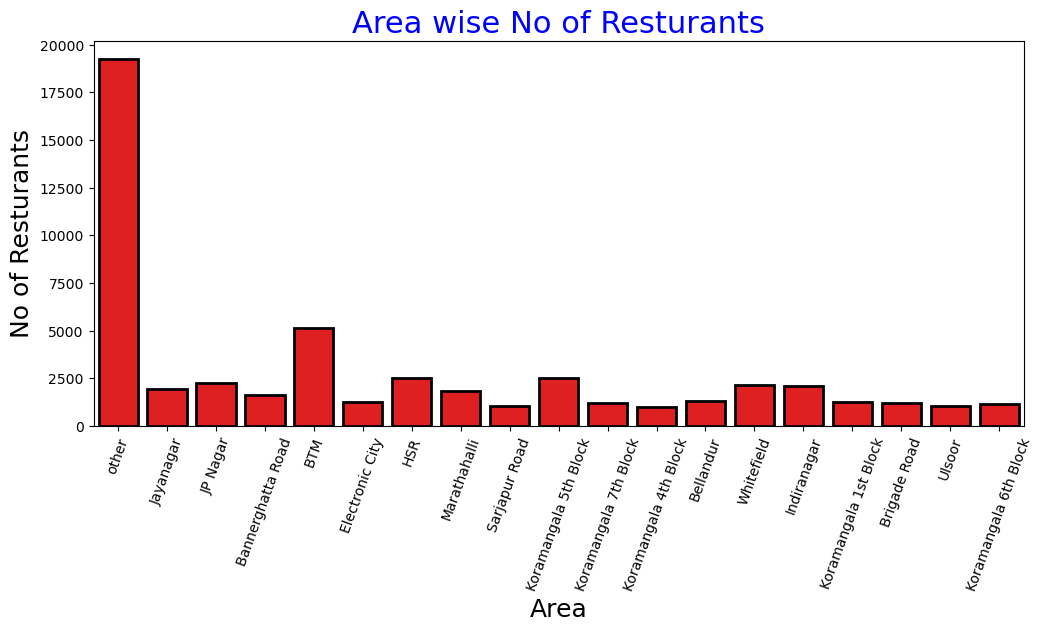

In [478]:
number_city = df["location"].nunique()

print("Totol Area where Resturants are located : ", number_city)
plt.figure(figsize= (12, 5))

sns.countplot(data = df, x = "location", edgecolor= "black" , color= "red", linewidth = 2)
plt.xlabel("Area", fontsize = 18)
plt.ylabel("No of Resturants", fontsize = 18)
plt.title("Area wise No of Resturants", fontsize = 22, color = "blue")
plt.xticks(rotation = 70)

plt.show()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost2plates,reviews_list,menu_item,type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,other,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",other,800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,other,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",other,800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,other,other,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",other,800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,other,Quick Bites,Masala Dosa,other,300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,other,Casual Dining,"Panipuri, Gol Gappe",other,600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet


## *Analysing on the basis of rate*

In [543]:
## we will make different categories on the basis of ratings wheather they are above 4.5 or 4 or below 3
df["rate"]= df["rate"].astype(float)
rate_above_4_5 = df[df["rate"] > 4.5]
rate_4  = df[(df["rate"] > 3.5) & (df["rate"] <= 4.5)] 
rate_below_3_5 =df[(df["rate"] > 0) & (df["rate"] <= 3.5)]

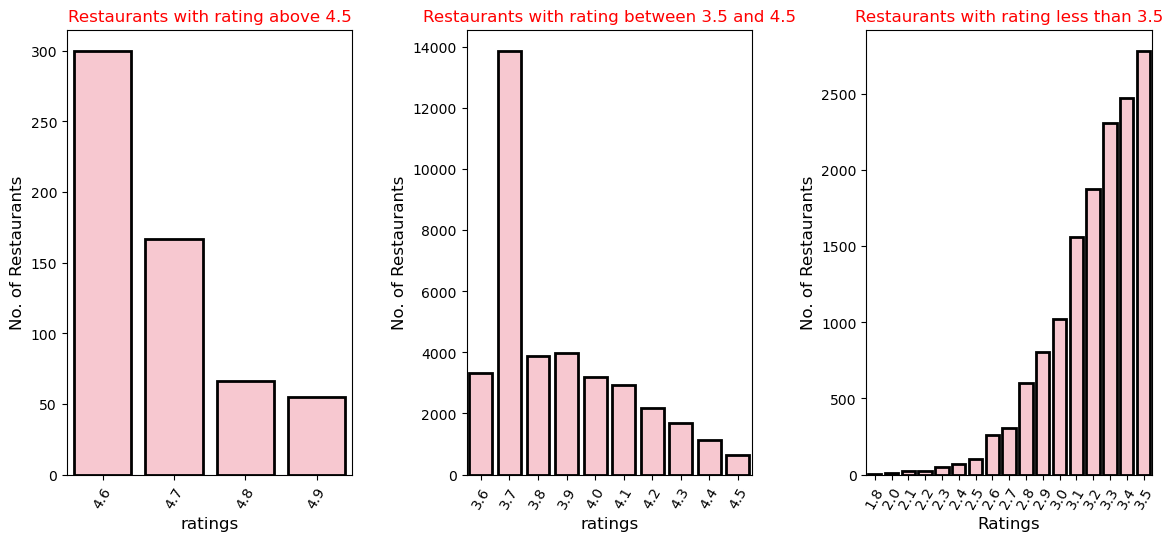

In [575]:
# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# Plotting
sns.countplot(data=rate_above_4_5, x="rate", ax=ax[0], edgecolor = "black", linewidth = 2, color = "pink")
ax[0].set_title("Restaurants with rating above 4.5", fontsize=12, color="Red")
ax[0].tick_params(axis='x', rotation=60)
ax[0].set_xlabel("ratings", fontsize=12)
ax[0].set_ylabel("No. of Restaurants", fontsize=12)

sns.countplot(data=rate_4, x="rate", ax=ax[1], edgecolor = "black", linewidth = 2, color = "pink")
ax[1].set_title("Restaurants with rating between 3.5 and 4.5", fontsize=12, color="Red")
ax[1].tick_params(axis='x', rotation=60)
ax[1].set_xlabel("ratings", fontsize=12)
ax[1].set_ylabel("No. of Restaurants", fontsize=12)

sns.countplot(data=rate_below_3_5, x="rate", ax=ax[2], edgecolor = "black", linewidth = 2, color = "pink")
ax[2].set_title("Restaurants with rating less than 3.5", fontsize=12, color="Red")
ax[2].tick_params(axis='x', rotation=60)
ax[2].set_xlabel("Ratings", fontsize=12)
ax[2].set_ylabel("No. of Restaurants", fontsize=12)


# Adjust layout
plt.subplots_adjust(wspace = 0.4,top=1, hspace=1)
plt.show()

## *Creating a code that will provide the user details if they give the rating and location*

In [695]:
location_user = df['location'].unique()
print("Available locations:")
for location in location_user:
    print(location)

# Input from user
a = float(input("ENTER THE RATINGS (e.g., 4.0): "))
b = input("ENTER THE LOCATION: ")

# Filter the DataFrame based on user input
df1 = df[(df['rate'] == a) & (df['location'] == b)]

# Reset index for cleaner output
df1 = df1.reset_index()

# Display the results
if df1.empty:
    print("No restaurants found")
else:
    for index, row in df1.iterrows():
        print(f"{row['name']}: {row['cost2plates']} : {row['address']}")


Available locations:
other
Jayanagar
JP Nagar
Bannerghatta Road
BTM
Electronic City
HSR
Marathahalli
Sarjapur Road
Koramangala 5th Block
Koramangala 7th Block
Koramangala 4th Block
Bellandur
Whitefield
Indiranagar
Koramangala 1st Block
Brigade Road
Ulsoor
Koramangala 6th Block


ENTER THE RATINGS (e.g., 4.0):  4.9
ENTER THE LOCATION:  Whitefield


Flechazo: 1400 : 120 A3, 2nd Floor, Santosh Tower, EPIP Industrial Area, Phase 1, Hoodi Village, Whitefield, Bangalore
Punjab Grill: 2000 : Ground Floor, Forum Shantiniketan, Whitefield Main Road, Hoodi, Whitefield, Bangalore
Flechazo: 1400 : 120 A3, 2nd Floor, Santosh Tower, EPIP Industrial Area, Phase 1, Hoodi Village, Whitefield, Bangalore
Flechazo: 1400 : 120 A3, 2nd Floor, Santosh Tower, EPIP Industrial Area, Phase 1, Hoodi Village, Whitefield, Bangalore


## **Analysing multi-columns**

## *Checking oline order and book table facilities*

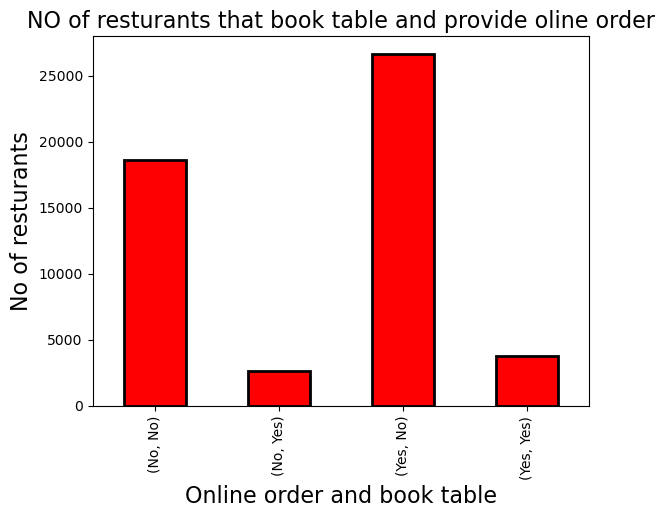

In [735]:
df.groupby(["online_order", "book_table"]).size().plot(kind = "bar", color = "red", edgecolor = "black", linewidth = 2)
plt.xlabel("Online order and book table", fontsize = 16)
plt.ylabel("No of resturants", fontsize= 16)
plt.title("NO of resturants that book table and provide oline order", fontsize= 16)
plt.show()

## *analysing booktable and online order by their type*

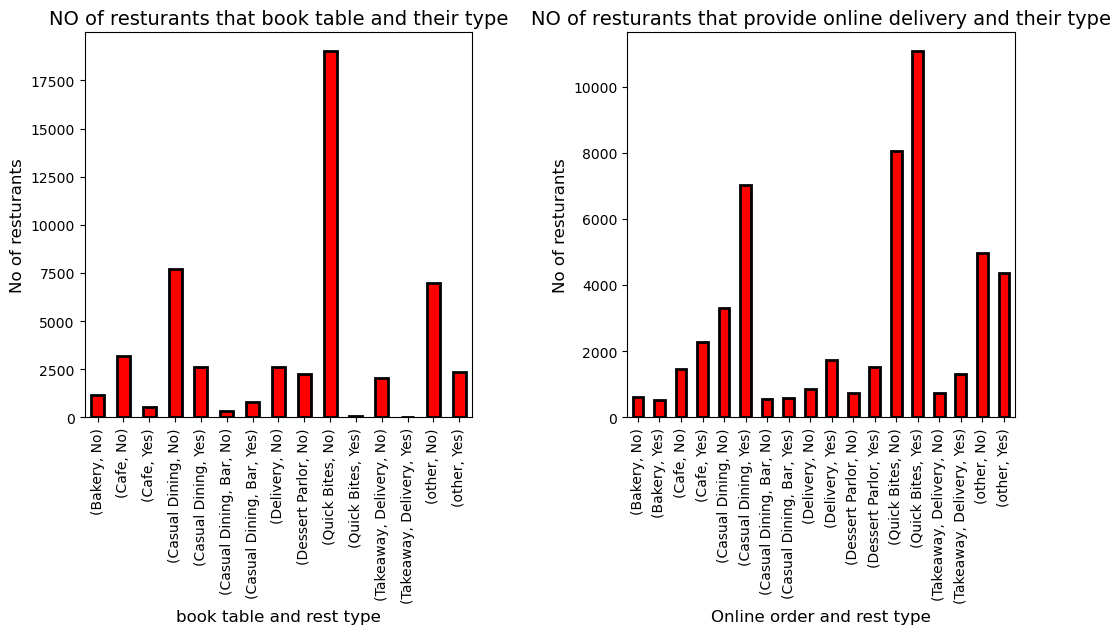

In [768]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
df.groupby(["rest_type" ,"book_table"]).size().plot(kind = "bar", color = "red", edgecolor = "black", linewidth = 2, ax = ax[0])
ax[0].set_xlabel("book table and rest type", fontsize = 12)
ax[0].set_ylabel("No of resturants", fontsize= 12)
ax[0].set_title("NO of resturants that book table and their type", fontsize= 14)



df.groupby(["rest_type" ,"online_order"]).size().plot(kind = "bar", color = "red", edgecolor = "black", linewidth = 2, ax = ax[1])
ax[1].set_xlabel("Online order and rest type", fontsize = 12)
ax[1].set_ylabel("No of resturants", fontsize= 12)
ax[1].set_title("NO of resturants that provide online delivery and their type", fontsize= 14)

plt.subplots_adjust(wspace = 0.4)
plt.show()

## *Analysing Resturant type and Rateing*

C:\Users\hp\AppData\Local\Temp\ipykernel_2232\1295634706.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "type", y = "rate", palette = "husl")


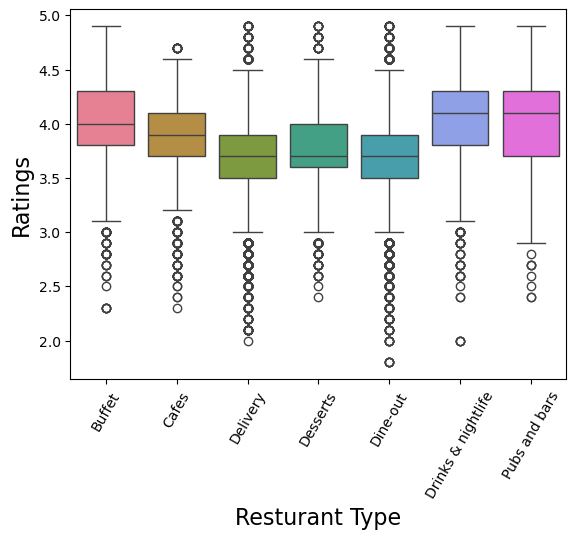

In [788]:
sns.boxplot(data = df, x = "type", y = "rate", palette = "husl")
plt.xlabel("Resturant Type", fontsize = 16)
plt.ylabel("Ratings", fontsize = 16)
plt.xticks(rotation = 60)
plt.show()


## *No of votes location wise*

C:\Users\hp\AppData\Local\Temp\ipykernel_2232\2586537869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x= "location", y = "votes", palette = "husl", edgecolor= "black")


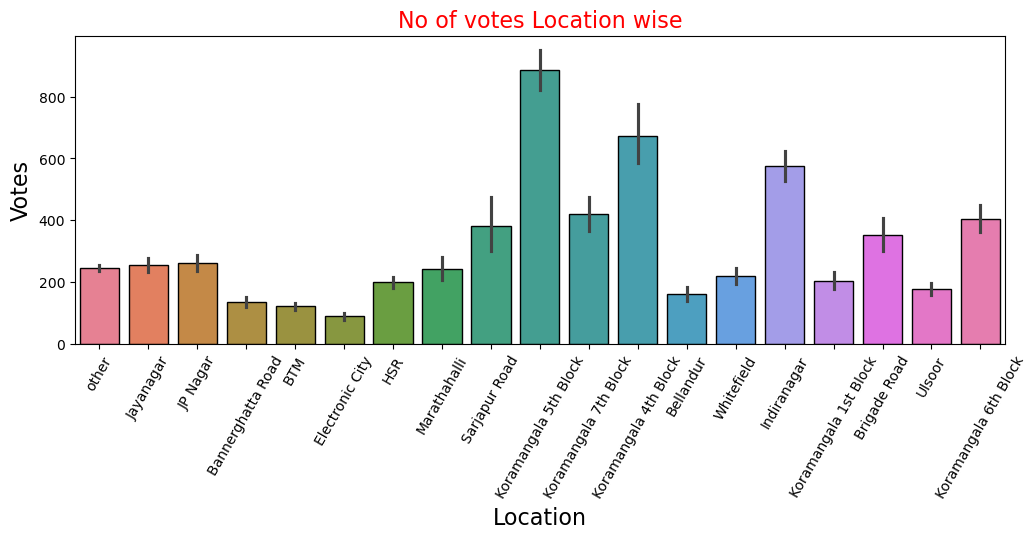

In [808]:
plt.figure(figsize = (12,4))
sns.barplot(data = df, x= "location", y = "votes", palette = "husl", edgecolor= "black")
plt.xlabel("Location", fontsize = 16)
plt.ylabel("Votes", fontsize = 16)
plt.title("No of votes Location wise", fontsize = 16, color = "red")
plt.xticks(rotation = 60)
plt.show()

## *Top cuisines vote wise*

C:\Users\hp\AppData\Local\Temp\ipykernel_2232\1358067337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x= "cuisines", y = "votes", palette = "husl", edgecolor= "black")


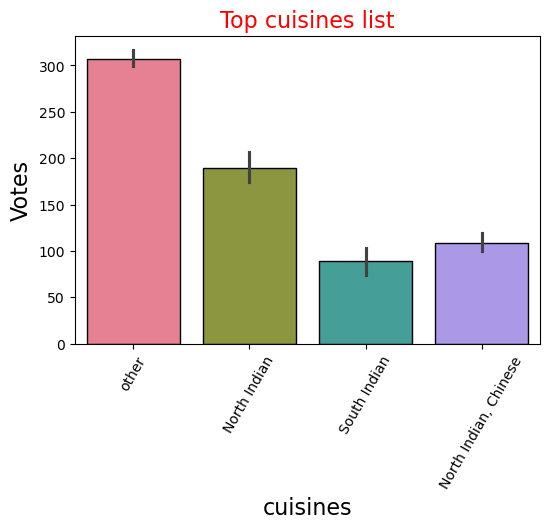

In [813]:
plt.figure(figsize = (6,4))
sns.barplot(data = df, x= "cuisines", y = "votes", palette = "husl", edgecolor= "black")
plt.xlabel("cuisines", fontsize = 16)
plt.ylabel("Votes", fontsize = 16)
plt.title("Top cuisines list", fontsize = 16, color = "red")
plt.xticks(rotation = 60)
plt.show()
